In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

def generate_bank_data(n=5000, random_state=42):
    np.random.seed(random_state)

    # Age: 21–65
    age = np.random.randint(21, 66, n)

    # Income: log-normal (thu nhập lệch phải)
    income = np.random.lognormal(mean=10.5, sigma=0.4, size=n)

    # Loan amount phụ thuộc income
    loan_amount = income * np.random.uniform(0.2, 0.8, n)

    # Debt-to-Income Ratio (DTI)
    debt_income_ratio = loan_amount / income

    # Xác suất default (logic kinh tế)
    risk_score = (
        0.03 * (age < 25) +
        0.04 * (age > 55) +
        1.5 * debt_income_ratio +
        np.random.normal(0, 0.3, n)
    )

    # Sigmoid → xác suất default
    default_prob = 1 / (1 + np.exp(-risk_score))

    # Default (0/1)
    default = np.random.binomial(1, default_prob)

    df = pd.DataFrame({
        "age": age,
        "income": income,
        "loan_amount": loan_amount,
        "debt_income_ratio": debt_income_ratio,
        "default": default
    })

    return df


In [3]:
df = generate_bank_data(n=5000)
df.head()


,age,income,loan_amount,debt_income_ratio,default
0,59,77781.168896,36626.962917,0.470898,1
1,49,69590.515546,53103.195142,0.763081,1
2,35,88213.217882,24127.328266,0.273511,1
3,63,34077.135182,11150.608071,0.327217,0
4,28,40874.014405,8899.302191,0.217725,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[["age", "income", "loan_amount", "debt_income_ratio"]]
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


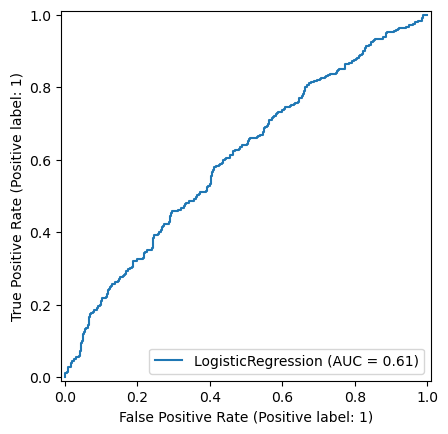

In [6]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)


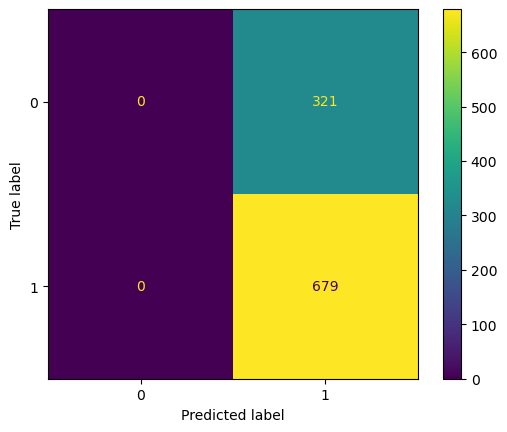

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


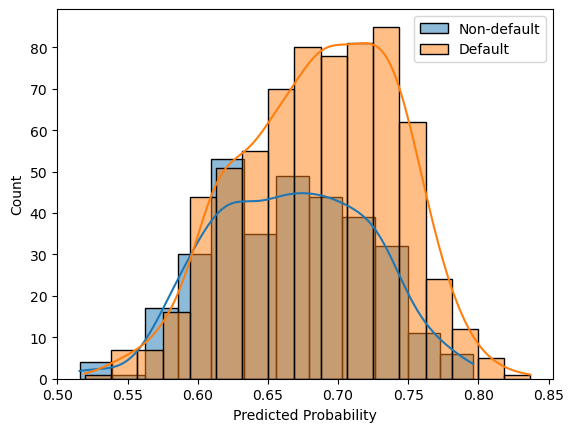

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_prob[y_test == 0], label="Non-default", kde=True)
sns.histplot(y_prob[y_test == 1], label="Default", kde=True)
plt.legend()
plt.xlabel("Predicted Probability")
plt.show()


C:\Users\hi\AppData\Local\Temp\ipykernel_9040\186752419.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_test.groupby("DTI_bin")["default"].mean().plot(marker="o")


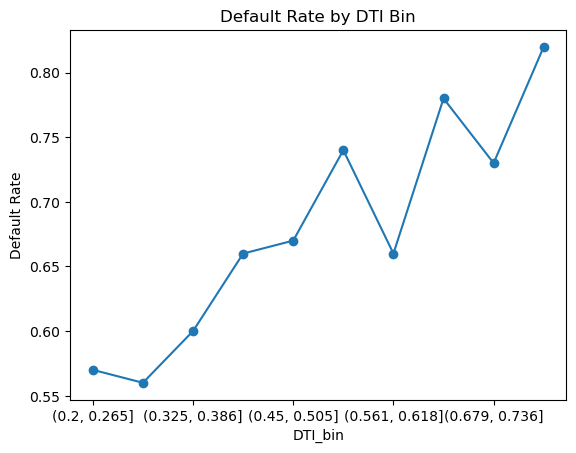

In [9]:
df_test = X_test.copy()
df_test["default"] = y_test.values
df_test["DTI_bin"] = pd.qcut(df_test["debt_income_ratio"], q=10)

df_test.groupby("DTI_bin")["default"].mean().plot(marker="o")
plt.ylabel("Default Rate")
plt.title("Default Rate by DTI Bin")
plt.show()


C:\Users\hi\AppData\Local\Temp\ipykernel_9040\443791605.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_test.groupby("DTI_bin")["error"].mean().plot(marker="o")


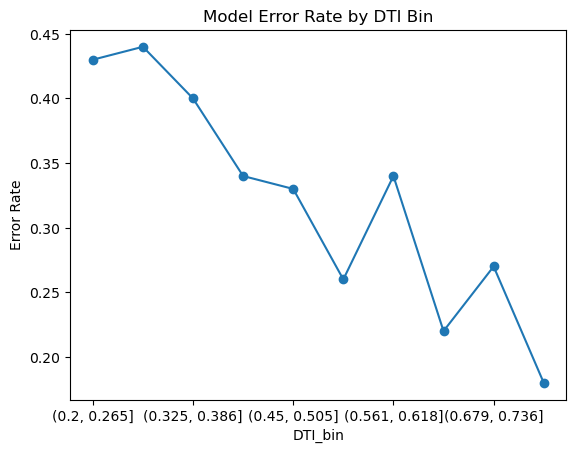

In [11]:
df_test["y_pred"] = y_pred
df_test["error"] = (df_test["y_pred"] != df_test["default"])

df_test.groupby("DTI_bin")["error"].mean().plot(marker="o")
plt.ylabel("Error Rate")
plt.title("Model Error Rate by DTI Bin")
plt.show()
